### Some useful libraries

In [476]:
%load_ext autoreload
%autoreload

import sys
sys.path.append('../')
sys.path.append('../libs_python')

# data munging and analytical libraries 
import re
import os
import numpy as np
import iris

# graphical libraries
import matplotlib.pyplot as plt
import numpy.ma as ma
import cartopy.crs as ccrs
from   plot_maps       import *
from   ExtractLocation import *
from   listdir_path    import *
import jules
import convertpoints2grid

# setup nice plotting
plt.style.use('ggplot')#
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


I only got a chance to grab 2000-2005 climate data before catching the train, so thats the time period we going to average over

In [472]:
start_year = 2000
end_year   = 2005

Where out jules output, cci "obs" and driving data are from

In [325]:
jules_dir = '../../fireMIPbenchmarking/data/ModelOutputs/JULES-INFERNO-S2/'
rain_dir  = '../data/CRUNCEP/rain/'
tair_dir  = '../data/CRUNCEP/tair/'
cci       = '../data/qrparm.veg.frac.nc'

### Load JULES

In [326]:
def open_files_annual_average(dir, s, e, FUN = jules, *arg, **kw):
    files = listdir_path(dir)
    years = np.array([int(file[s:e]) for file in files])
    files = np.array(files)
    files = files[(years >= start_year) & (years <= end_year)]
    dat = FUN.load(files, *arg, **kw)
    
    for i in dat[1:]: dat[0].data += i.data
    dat = dat[0] / len(dat)
    return(dat)

In [383]:
pft_name    = ['BL', 'NL','C3G', 'C4G', 'SH', 'Bare Soil']
layer_no    = [1   , 2   , 3   , 4    , 5    , 7         ]

frac_cover_jules = open_files_annual_average(jules_dir, -7, -3, jules, "Fractional cover of each surface type")
frac_cover_jules = frac_cover_jules
frac_cover_jules = frac_cover_jules.collapsed('time', iris.analysis.MEAN)[layer_no]

C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


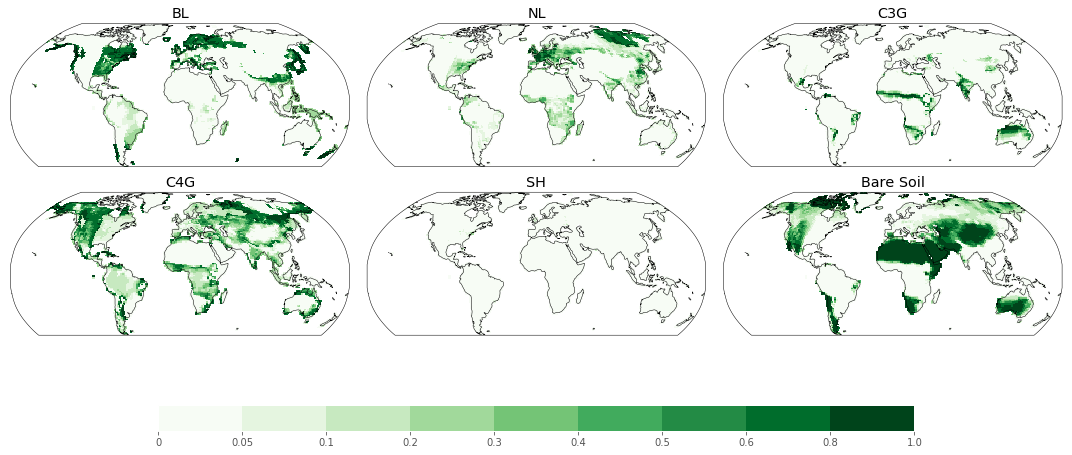

In [398]:
cover_levels  = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]
cover_dlevels = [-0.5, -0.2, -0.1, -0.05, -0.01, 0.01, 0.05, 0.1, 0.2, 0.5]

def plot_cover_data(cubes, cmap = 'brewer_Greens_09', levels = cover_levels):
    plot_cubes_map(cubes, pft_name, cmap, levels, ny = 3, 
                   figXscale = 2.5, figYscale = 0.6)

plot_cover_data(frac_cover_jules)

### Load CCI

C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


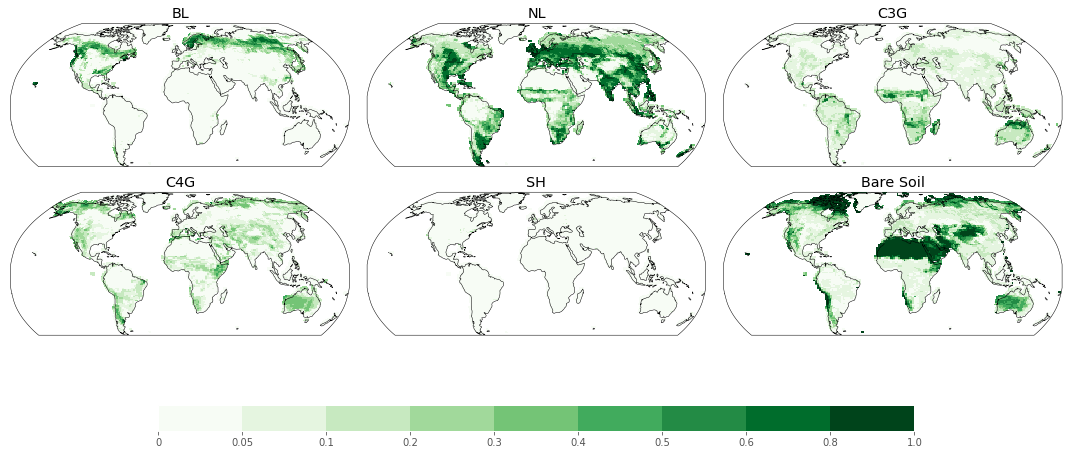

In [406]:
frac_cover_cci = iris.load_cube(cci)[layer_no]

def addLatLon(cube):
    cubei = frac_cover[0].copy()
    cubei.data = cube.data[-118:-6:,]
    return(cubei)

def addLatLons(cube):
    index = range(0, cube.shape[0])
    cubei = frac_cover[index].copy()
    for i in index: cubei.data[i] = cube.data[i][-118:-6:,]
    return(cubei)

frac_cover_cci = addLatLons(frac_cover_cci)
plot_cover_data(frac_cover_cci)

C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


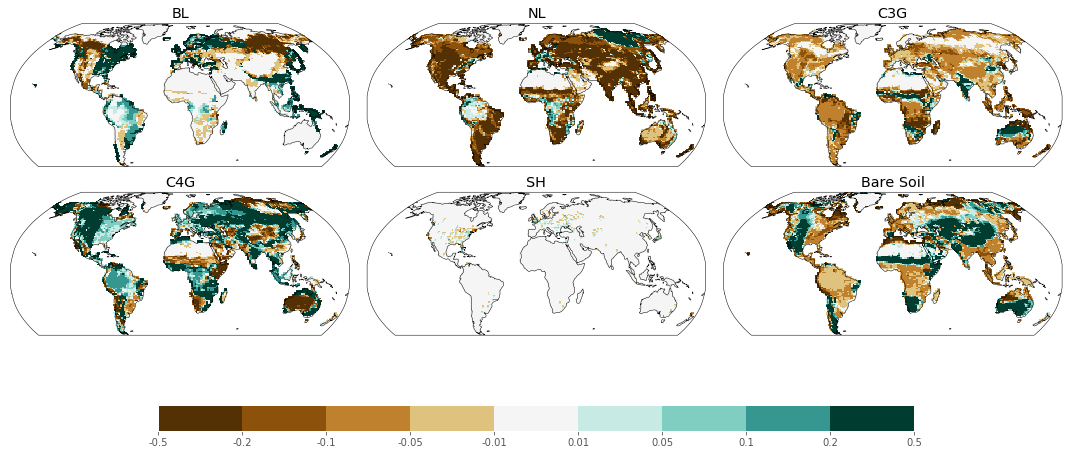

In [402]:
frac_cover_diff = frac_cover_jules.copy()
frac_cover_diff.data -= frac_cover_cci.data
frac_cover_diff
plot_cover_data(frac_cover_diff, "brewer_BrBG_11", cover_dlevels)

### Load climate

### Rainfall
We'll load rain to start with. We going to look at mean annual precip and seasonality in precip. Inert annual variability might also be a good idea... just not from only 6 years of climate obs

In [403]:
rain = open_files_annual_average(rain_dir, -11, -7, iris, "Total_Precipitation")

C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
C:\Users\dou

#### Mean Annual Percip (MAP)

In [408]:
MAP = rain.collapsed('time', iris.analysis.SUM) * 60 * 60 * 4
MAP = addLatLon(MAP)

C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1210: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


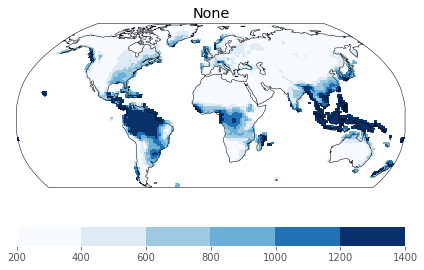

In [409]:
plot_lonely_cube(MAP, cmap = "brewer_Blues_09", levels = [200, 400, 600, 800, 1000, 1200, 1400])

#### Seasonality

C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1210: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


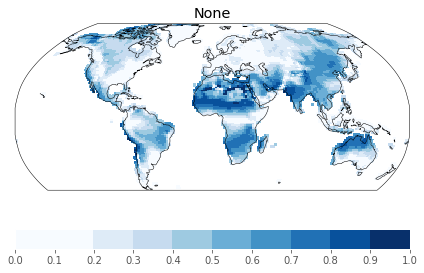

In [410]:
nt = rain.shape[0]
x = np.arange(0, 1, 1.0/nt) * 2 * np.pi
y = np.sin(x)
x = np.cos(x)



rain_x = rain.copy()
rain_y = rain.copy()

for i in range(0, nt): 
    rain_x.data[i] = rain.data[i] * x[i]
    rain_y.data[i] = rain.data[i] * y[i]
    

rain_x = rain_x.collapsed('time', iris.analysis.SUM)
rain_y = rain_y.collapsed('time', iris.analysis.SUM)


rain_v = np.power(rain_x, 2) + np.power(rain_y, 2)
rain_v = np.power(rain_v, (1/2))
rain_c = rain_v/rain.collapsed('time', iris.analysis.SUM)

rain_c = addLatLon(rain_c)
plot_lonely_cube(rain_c, cmap = "brewer_Blues_09", levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


### Air temp

In [411]:
'../data/CRUNCEP/tair/'

'../data/CRUNCEP/tair/'

In [412]:
tair = open_files_annual_average(tair_dir, -11, -7, iris, "Temperature")

C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
C:\Users\dougl\Anaconda3\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:2076: UserWarning: Failed to create 'time' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
C:\Users\dou

In [413]:
MAT = tair.collapsed('time', iris.analysis.MEAN) -273.15
MAT = addLatLon(MAT)

C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1210: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


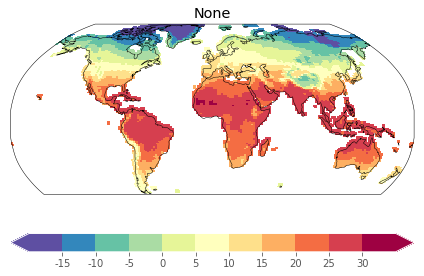

In [414]:
plot_lonely_cube(MAT, cmap = "Spectral_r", levels = [-15, -10, -5, 0, 5, 10, 15, 20, 25, 30], extend = 'both')

C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1210: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\dougl\Anaconda3\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


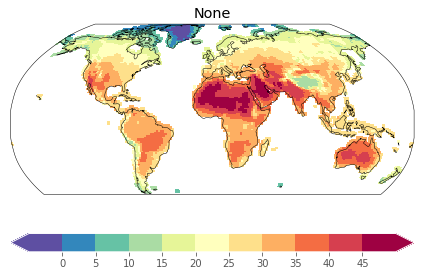

In [415]:
MxAT = tair.collapsed('time', iris.analysis.MAX) -273.15
MxAT = addLatLon(MxAT)
plot_lonely_cube(MxAT, cmap = "Spectral_r", levels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45], extend = 'both')

## Veg frac climate zone
So, we have frac_cover from jules, frac_cover_cci from observations. And we'll see where in MAP, rain_c, MAT, MxAT they fall.

(0, 2000)

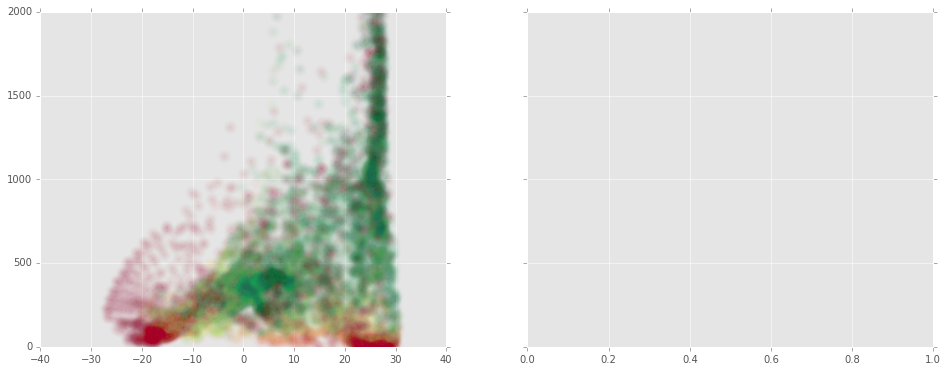

In [479]:
zs  = frac_cover_cci.data.copy()
zsi = zs.copy()

zsi[zs <= cover_levels[0]] = 0
zsi[zs <= cover_levels[-1]] = len(cover_levels)

mn = cover_levels[0]
mx = cover_levels[1]


for i, mn, mx in zip(range(len(cover_levels) - 1), cover_levels[:-1], cover_levels[1:]):
    zsi[(zs > mn) & (zs < mx)] = i

plt.rcParams['figure.figsize'] = (16, 6)
fig, ax = plt.subplots(1,2, sharey=True)
for i in [200, 150, 100, 75, 50, 25, 10, 5, 2, 1]:
    ax[0].scatter(MAT.data,MAP.data, c = zsi[5], cmap = 'RdYlGn_r', s = i, alpha = 0.01)
plt.ylim(0, 2000)